In [5]:
import pandas as pd
import numpy as np

In [7]:
# Load the training dataset
train_df = pd.read_csv('twitter_training.csv')

# Load the validation dataset
val_df = pd.read_csv('twitter_validation.csv')

# Display the first few rows of the training dataset
print(train_df.head(10))

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2402  Borderlands  Positive   
6  2402  Borderlands  Positive   
7  2402  Borderlands  Positive   
8  2402  Borderlands  Positive   
9  2402  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
5  So I spent a few hours making something for fu...     
6  So I spent a couple of hours doing something f...     
7  So I spent a few hours doing something for fun...     
8  So I spent a few hours making something for fu...     
9  2010 So I spent a few hours making somethi

In [10]:
import re
import pandas as pd

# Define a function to clean text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'\s+', ' ', text)    # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuations
    return text.strip().lower()

# Handle NaN and non-string values by converting them to empty strings
train_df.iloc[:, 3] = train_df.iloc[:, 3].fillna("").astype(str)
val_df.iloc[:, 3] = val_df.iloc[:, 3].fillna("").astype(str)

# Apply the cleaning function to text columns
train_df['cleaned_text'] = train_df.iloc[:, 3].apply(clean_text)
val_df['cleaned_text'] = val_df.iloc[:, 3].apply(clean_text)


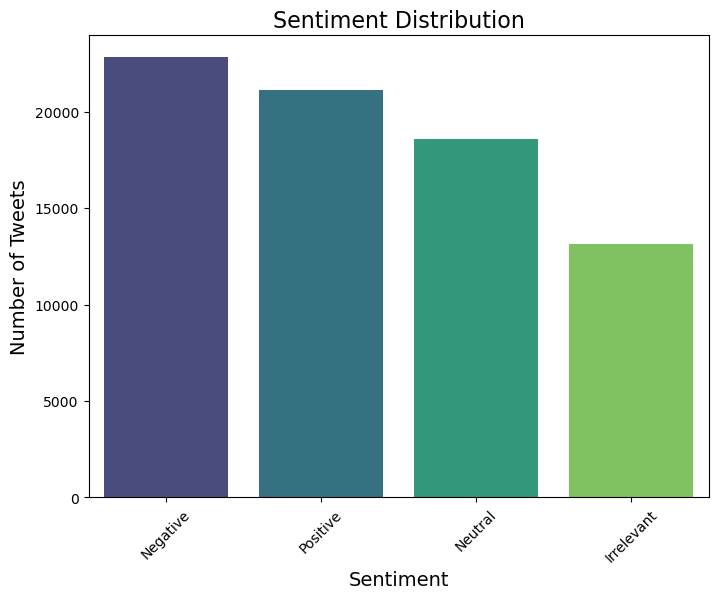

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets for visualization purposes
combined_data = pd.concat([
    train_df[['cleaned_text', train_df.columns[2]]].rename(columns={train_df.columns[2]: 'Sentiment'}),
    val_df[['cleaned_text', val_df.columns[2]]].rename(columns={val_df.columns[2]: 'Sentiment'})
])

# Aggregate sentiment counts
sentiment_counts = combined_data['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(rotation=45)
plt.show()
